Time arrival follows exp
Service follows exp

In [ ]:
pip install ciw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.8/93.8 kB 2.3 MB/s eta 0:00:00


In [14]:
import ciw
import matplotlib.pyplot as plt
import pandas as pd ,seaborn as sns, numpy as np ,matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import expon, poisson,gamma
import numpy as np
from scipy.stats import ks_2samp, kstest
import statsmodels.api as sm
warnings.filterwarnings('ignore')
np.random.seed(0)
import matplotlib
font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)


In [13]:
import math

##### M/M/1##########
def m_m_1(𝜆,µ,c=1):
    𝜌 = 𝜆/µ
    p0 = 1 - 𝜌
    lq = 𝜌**2/(1-𝜌)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,L,wq,W)

##### x! ##########
def factorial(x):
    if (x == 1) or (x==0):
        return 1
    else:
        # recursive call to the function
        return (x * factorial(x-1))

###################
def user_defined_sum(c,𝜌):
    sum = 0
    for n in range(c):
        sum += (c*𝜌)**n/factorial(n)

    return 1/(sum + (c*𝜌)**c/(factorial(c)*(1-𝜌)))

##### M/M/c ##########
def m_m_c(𝜆,µ,c):
    𝜌 = 𝜆/(c*µ)
    p0 = user_defined_sum(c,𝜌)
    lq = (c*𝜌)**c*p0*𝜌/(factorial(c)*(1-𝜌)**2)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,wq,L,W)

######## G/G/C ###########
def g_g_c(s,cv_s,a,cv_a,c):

    𝜌 = s/(c*a)
    wq = s/c * (cv_a**2+cv_s**2)/2 * 𝜌**(-1+math.sqrt(2*(c+1)))/(1- 𝜌)

    service_time = s
    W = wq + s
    L = W * 𝜆
    lq = wq * 𝜆
    return(𝜌,lq,wq,L,W)

1. What is the current level of activity in the queuing systems of Toronto and London? This includes factors like their utilization rate, wait times, and the length of their wait lists. Provide your thoughts on the findings (employ steady-state analytical methods to evaluate the performance of the systems).  

In [43]:
# London
def m_m_1(𝜆,µ,c=1):
    𝜌 = 𝜆/µ
    p0 = 1 - 𝜌
    lq = 𝜌**2/(1-𝜌)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,L,wq,W)

London_utilization, not_in_service, length_of_queue, length_of_system, time_in_queue, time_in_system = m_m_1(109.025, 110.047,c=1)
print('London_utilization_rate:{}'.format(round(London_utilization,3)))
print('London_length_of_wait_list:{}'.format(round(length_of_queue,3)))
print('London_wait_time_inqueue:{}'.format(round(time_in_queue,3)))


London_utilization_rate:0.991
London_length_of_wait_list:105.687
London_wait_time_inqueue:0.969


In [44]:
# Toronto
def m_m_1(𝜆,µ,c=1):
    𝜌 = 𝜆/µ
    p0 = 1 - 𝜌
    lq = 𝜌**2/(1-𝜌)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,L,wq,W)

Toronto_utilization, not_in_service, length_of_queue, length_of_system, time_in_queue, time_in_system = m_m_1(327.259, 327.514,c=1)
print('Toronto_utilization_rate:{}'.format(round(Toronto_utilization,3)))
print('Toronto_length_of_wait_list:{}'.format(round(length_of_queue,3)))
print('Toronto_wait_time_inqueue:{}'.format(round(time_in_queue,3)))

Toronto_utilization_rate:0.999
Toronto_length_of_wait_list:1282.369
Toronto_wait_time_inqueue:3.919


Both Toronto and London center are very busy as their utilization rate is very close to 1, therefore they have a long wait list and long wait time.



2. Create three different queuing system designs and assess their performance compared to the existing setup. Determine which design would be most advantageous for the patients. Share your insights on the outcomes  (employ steady-state analytical methods to evaluate the performance of the systems).

In [ ]:
# Pooled Queues with Two Servers
𝜆 = 109.025+327.259  #arrival rate
µ = 110.047+327.514   # service rate
c =2
𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c)
print('utilization_rate:{}'.format(round(𝜌,3)))
print('length_of_wait_list:{}'.format(round(lq,3)))
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in system:{}'.format(round(W,3)))

utilization_rate:0.499
length_of_wait_list:0.33
Avg. Time in queue:0.001
Avg. Time in system:0.003


In [ ]:
# combined Queues with one combined Servers
𝜆 = 109.025+327.259  #arrival rate
µ = 110.047+327.514   # service rate
c =1
𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c)
print('utilization_rate:{}'.format(round(𝜌,3)))
print('length_of_wait_list:{}'.format(round(lq,3)))
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in system:{}'.format(round(W,3)))

utilization_rate:0.997
length_of_wait_list:340.651
Avg. Time in queue:0.781
Avg. Time in system:0.783


From the evaluation metrics, we can see that pooled queues with two servers have the smallest wait time and queue

3. Conduct discrete event simulations to evaluate how variability in both arrival and service processes affects the original waitlist and the proposed design from question 2.

In [27]:
l = 109.025 # arrival rate to London
mu = 110.047 # service rate to London
c = 1
decimal = 4
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=l)],
    service_distributions=[ciw.dists.Exponential(rate=mu)],
    number_of_servers=[1])

In [19]:
seeds = [i for i in range(0, 100)]
avg_wait_time = []
for s in seeds:
  ciw.seed(s)
  Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())

  # Stopping Criteria
  Q.simulate_until_max_customers(1000)
  #Q.simulate_until_max_time(10000)

  recs = Q.get_all_records()
  df = pd.DataFrame(recs)
  df.sort_values(by='arrival_date',inplace=True)
  df['inter_arrival'] = df.arrival_date - df.arrival_date.shift(1,fill_value=0)
  df['system_time'] = df.exit_date - df.arrival_date
  df[['id_number','server_id','arrival_date','waiting_time','service_start_date','server_id','service_time','service_end_date','exit_date','queue_size_at_arrival','queue_size_at_departure']]
  avg_wait_time.append(df['waiting_time'].mean())




In [25]:
sum(avg_wait_time)/len(avg_wait_time)

0.18909281433478445

average waiting time is 0.189 year in london by using simulation

In [29]:
l = 327.259 # arrival rate to Toronto
mu = 327.514 # service rate to Toronto
c = 1
decimal = 4
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=l)],
    service_distributions=[ciw.dists.Exponential(rate=mu)],
    number_of_servers=[c])

In [30]:
seeds = [i for i in range(0, 100)]
avg_wait_time = []
for s in seeds:
  ciw.seed(s)
  Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())

  # Stopping Criteria
  Q.simulate_until_max_customers(1000)
  #Q.simulate_until_max_time(10000)

  recs = Q.get_all_records()
  df = pd.DataFrame(recs)
  df.sort_values(by='arrival_date',inplace=True)
  df['inter_arrival'] = df.arrival_date - df.arrival_date.shift(1,fill_value=0)
  df['system_time'] = df.exit_date - df.arrival_date
  df[['id_number','server_id','arrival_date','waiting_time','service_start_date','server_id','service_time','service_end_date','exit_date','queue_size_at_arrival','queue_size_at_departure']]
  avg_wait_time.append(df['waiting_time'].mean())




In [31]:
sum(avg_wait_time)/len(avg_wait_time)

0.07740451921415953

average waiting time is 0.077 year in Toronto by using simulation

In [34]:
# Pooled Queues with Two Servers
l = 109.025+327.259  #arrival rate
mu = 110.047+327.514   # service rate
c =2
decimal = 4
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=l)],
    service_distributions=[ciw.dists.Exponential(rate=mu)],
    number_of_servers=[c])

In [35]:
seeds = [i for i in range(0, 100)]
avg_wait_time = []
for s in seeds:
  ciw.seed(s)
  Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())

  # Stopping Criteria
  Q.simulate_until_max_customers(1000)
  #Q.simulate_until_max_time(10000)

  recs = Q.get_all_records()
  df = pd.DataFrame(recs)
  df.sort_values(by='arrival_date',inplace=True)
  df['inter_arrival'] = df.arrival_date - df.arrival_date.shift(1,fill_value=0)
  df['system_time'] = df.exit_date - df.arrival_date
  df[['id_number','server_id','arrival_date','waiting_time','service_start_date','server_id','service_time','service_end_date','exit_date','queue_size_at_arrival','queue_size_at_departure']]
  avg_wait_time.append(df['waiting_time'].mean())




In [36]:
sum(avg_wait_time)/len(avg_wait_time)

0.0007424153693518712

In [39]:
def compute_simu_average(l,mu,c):
  N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=l)],
    service_distributions=[ciw.dists.Exponential(rate=mu)],
    number_of_servers=[c])
  seeds = [i for i in range(0, 100)]
  avg_wait_time = []
  for s in seeds:
    ciw.seed(s)
    Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())

    # Stopping Criteria
    Q.simulate_until_max_customers(1000)
    #Q.simulate_until_max_time(10000)

    recs = Q.get_all_records()
    df = pd.DataFrame(recs)
    df.sort_values(by='arrival_date',inplace=True)
    df['inter_arrival'] = df.arrival_date - df.arrival_date.shift(1,fill_value=0)
    df['system_time'] = df.exit_date - df.arrival_date
    df[['id_number','server_id','arrival_date','waiting_time','service_start_date','server_id','service_time','service_end_date','exit_date','queue_size_at_arrival','queue_size_at_departure']]
    avg_wait_time.append(df['waiting_time'].mean())

  print(sum(avg_wait_time)/len(avg_wait_time))


average waiting time is 0.00074 year by using simulation

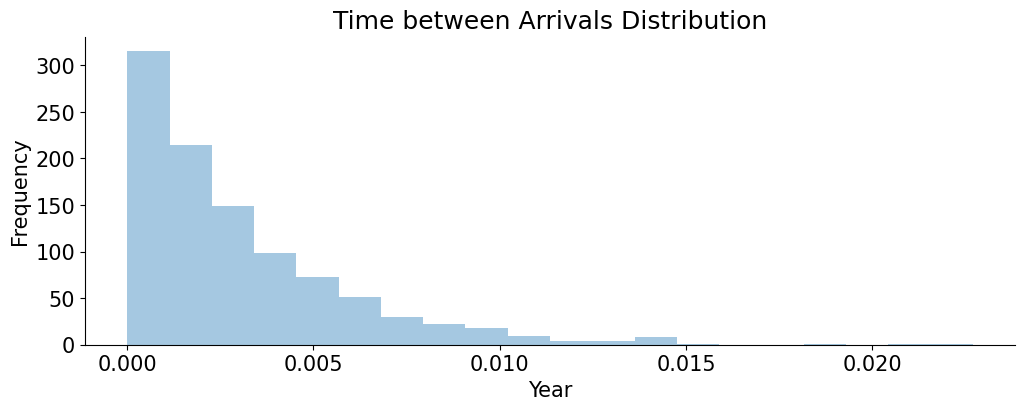

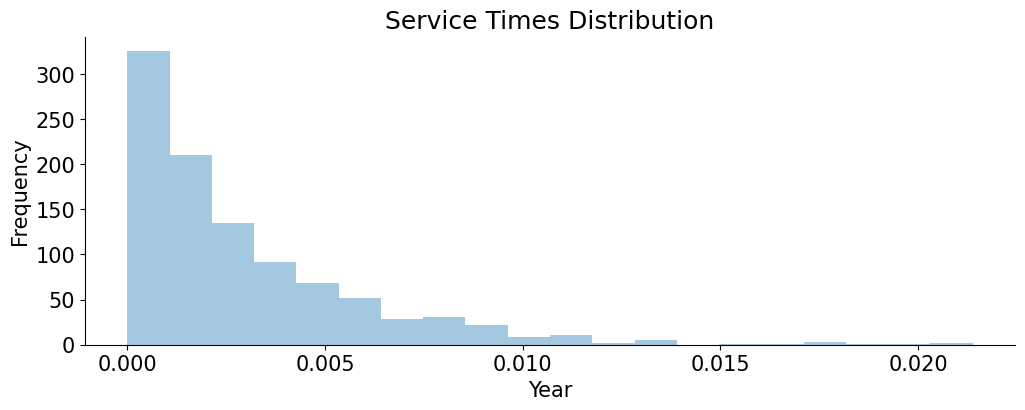

In [33]:
plt.figure(figsize=(12,4))
sns.distplot(df['inter_arrival'],kde=False,bins=20)
plt.title('Time between Arrivals Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
sns.despine()
plt.show()

plt.figure(figsize=(12,4))
sns.distplot(df['service_time'],kde=False,bins=20)
plt.title('Service Times Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
sns.despine()
plt.show()


4. Explore the potential consequences for the original waitlist if patient arrivals were to increase by 5%. Utilize both simulation techniques and steady-state analytical solutions to analyze the scenario.

In [40]:
l = 109.025*1.05 # arrival rate to London
mu = 110.047 # service rate to London
c = 1
compute_simu_average(l,mu,c)

0.27882972277882634


average waiting time increases from 0.189 year to 0.279 year in Toronto using simulation

In [41]:
l = 327.259*1.05 # arrival rate to Toronto
mu = 327.514 # service rate to Toronto
c = 1
compute_simu_average(l,mu,c)

0.11200069612950728


average waiting time increases from 0.077 year to 0.112 year in Toronto using simulation

In [42]:
# Pooled Queues with Two Servers
l = (109.025+327.259)*1.05  #arrival rate
mu = 110.047+327.514   # service rate
c =2
compute_simu_average(l,mu,c)

0.0008648347705110005


average waiting time increases from 0.00074 year to 0.000864 year of proposed queue system using simulation

In [45]:
# London
def m_m_1(𝜆,µ,c=1):
    𝜌 = 𝜆/µ
    p0 = 1 - 𝜌
    lq = 𝜌**2/(1-𝜌)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,L,wq,W)

London_utilization, not_in_service, length_of_queue, length_of_system, time_in_queue, time_in_system = m_m_1(109.025*1.05, 110.047,c=1)
print('London_utilization_rate:{}'.format(round(London_utilization,3)))
print('London_length_of_wait_list:{}'.format(round(length_of_queue,3)))
print('London_wait_time_inqueue:{}'.format(round(time_in_queue,3)))

London_utilization_rate:1.04
London_length_of_wait_list:-26.886
London_wait_time_inqueue:-0.235


In [46]:
# Toronto
def m_m_1(𝜆,µ,c=1):
    𝜌 = 𝜆/µ
    p0 = 1 - 𝜌
    lq = 𝜌**2/(1-𝜌)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,L,wq,W)

Toronto_utilization, not_in_service, length_of_queue, length_of_system, time_in_queue, time_in_system = m_m_1(327.259*1.05, 327.514,c=1)
print('Toronto_utilization_rate:{}'.format(round(Toronto_utilization,3)))
print('Toronto_length_of_wait_list:{}'.format(round(length_of_queue,3)))
print('Toronto_wait_time_inqueue:{}'.format(round(time_in_queue,3)))

Toronto_utilization_rate:1.049
Toronto_length_of_wait_list:-22.382
Toronto_wait_time_inqueue:-0.065


If we increase the arival rate by 5%, utilization rate is greater than 1, it will cause Customers Wait /Block/Balk/Renege

In [47]:
# Pooled Queues with Two Servers
𝜆 = (109.025+327.259)*1.05  #arrival rate
µ = 110.047+327.514   # service rate
c =2
𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c)
print('utilization_rate:{}'.format(round(𝜌,3)))
print('length_of_wait_list:{}'.format(round(lq,3)))
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in system:{}'.format(round(W,3)))

utilization_rate:0.523
length_of_wait_list:0.395
Avg. Time in queue:0.001
Avg. Time in system:0.003


If we increase the arival rate by 5%, the pooled queues with two servers will have longer wait time and queue with higher utilization rate

5. What specific recommendations would you make to improve the system?

Implement the pooled queue with two servers system, we should merge the waiting pool of Toronto and London, having two servers running at the same time, in this way, we can effectively reduct waiting time and waiting queue